## 라이브러리 임포트
-  실습에 필요한 라이브러리를 임포트한다.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

## 데이터 불러오기(학습 데이터, 테스트 데이터)
- 데이터 분석 단계에서 생성한 농구 포지션 예측하기의 학습 데이터 및 테스트 데이터를 로드합니다.

In [2]:
train = pd.read_csv("data/csv/basketball_train.csv")
test = pd.read_csv("data/csv/basketball_test.csv")

In [7]:
print(train.shape[0]) # 훈련용 데이터 셋 갯수. 행
print(train.shape[1]) # 훈련용 feature 의 갯수. 열

print(test.shape[0]) # 테스트용 데이터 셋 갯수. 행
print(test.shape[1]) # 테스트용 feature 의 갯수. 열

80
5
20
5


## 최적의 k 찾기

In [34]:
# import kNN library

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# 최적의 k 찾기. 3부터 시작해서 max_k_range/2 까지의 범위.
max_k_range = train.shape[0] // 2
k_list = []

for i in range(3, max_k_range, 2): # 3, 5, 7, ... 39
    k_list.append(i)
    
cross_validation_scores = []
x_train = train[['3P','TRB','BLK']]
y_train = train[['Pos']]

In [36]:
# 10-fold cross validation

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv=10, scoring = 'accuracy') # 데이터, 입력값, 결과값(2차원 배열을 1차원 배열로 풀어줌), 폴드값, 정확도
    cross_validation_scores.append(scores.mean())
    
print(cross_validation_scores)

[0.9, 0.8875, 0.8875, 0.9125, 0.925, 0.925, 0.9375, 0.925, 0.925, 0.925, 0.9125, 0.925, 0.925, 0.9125, 0.8875, 0.875, 0.875, 0.85, 0.85]


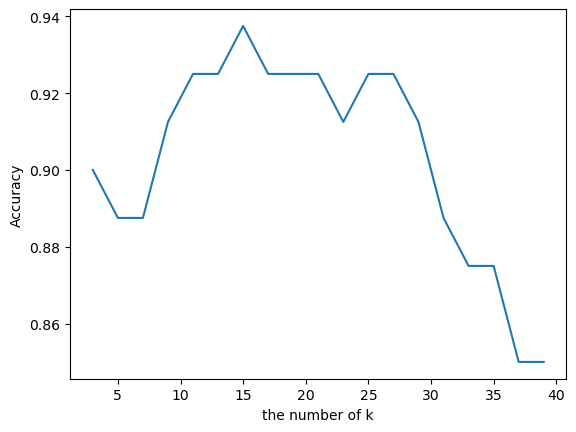

In [41]:
# 시각화

plt.plot(k_list,cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

In [40]:
# 최적의 k 값
cvs = cross_validation_scores
k = k_list[cvs.index(max(cross_validation_scores))]
print("최적의 k 값 : " + str(k))

최적의 k 값 : 15


## 2개의 특징으로 예측하기( '3P','BLK')

In [42]:
knn = KNeighborsClassifier(n_neighbors=k)

x_train = train[['3P','BLK']]
y_train = train[['Pos']]

knn.fit(x_train, y_train.values.ravel())

x_test = test[['3P','BLK']]
y_test = test[['Pos']]

pred = knn.predict(x_test)

In [44]:
comparision = pd.DataFrame({'prediction':pred, 'tarket':y_test.values.ravel()})
print(comparision)

   prediction tarket
0          SG     SG
1          SG     SG
2          SG     SG
3           C      C
4          SG     SG
5          SG     SG
6          SG     SG
7           C      C
8          SG     SG
9           C      C
10         SG     SG
11         SG     SG
12         SG     SG
13         SG     SG
14          C      C
15         SG     SG
16         SG     SG
17         SG     SG
18         SG     SG
19          C      C


In [45]:
from sklearn.metrics import accuracy_score
print("accuracy : " + str(accuracy_score(y_test.values.ravel(), pred)))

accuracy : 1.0


## 3개의 특징으로 예측하기(3P, TRB, BLK)

In [46]:
knn = KNeighborsClassifier(n_neighbors=k)

x_train = train[['3P','BLK','TRB']]
y_train = train[['Pos']]

knn.fit(x_train, y_train.values.ravel())

x_test = test[['3P','BLK','TRB']]
y_test = test[['Pos']]

pred = knn.predict(x_test)

In [47]:
comparision = pd.DataFrame({'prediction':pred, 'tarket':y_test.values.ravel()})
print(comparision)

   prediction tarket
0          SG     SG
1          SG     SG
2          SG     SG
3           C      C
4          SG     SG
5          SG     SG
6          SG     SG
7           C      C
8           C     SG
9           C      C
10          C     SG
11         SG     SG
12         SG     SG
13         SG     SG
14         SG      C
15         SG     SG
16         SG     SG
17         SG     SG
18         SG     SG
19          C      C


In [48]:
print("accuracy : " + str(accuracy_score(y_test.values.ravel(), pred)))

accuracy : 0.85
